In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib.collections import PatchCollection

In [3]:
sampling_period = 50e-3 # integration time per beam
total_mapping_hours = 12
t = np.arange(total_mapping_hours*3600/sampling_period)*sampling_period

In [4]:
theta = t*2*np.pi/86400. #sky angle, one turn per day. Should probably be a sidereal day?

In [5]:
radius = 1.75 # radius of the map patch in degrees

In [6]:
r = radius*np.sin(t*2*np.pi/60.0)  # scan from -radius to +radius in azimuth, doing one full cycle per minute

In [7]:
p = r*np.exp(1j*theta)  # p.real = dec, p.imag = cross-dec

In [8]:
beam_spacing = 330/3600. # 330 arcsec between the two Ku band receiver beams
beam_fwhm = 55./3600 # 55 arcsec FWHM for Ku band

In [9]:
#
H,xedge,yedge = np.histogram2d(p.real,p.imag,bins=np.array([np.arange(-radius,radius,beam_fwhm),np.arange(-radius,radius,beam_fwhm)]))
H2,xedge,yedge = np.histogram2d(p.real+beam_spacing,p.imag,bins=np.array([np.arange(-radius,radius,beam_fwhm),np.arange(-radius,radius,beam_fwhm)]))

<IPython.core.display.Javascript object>


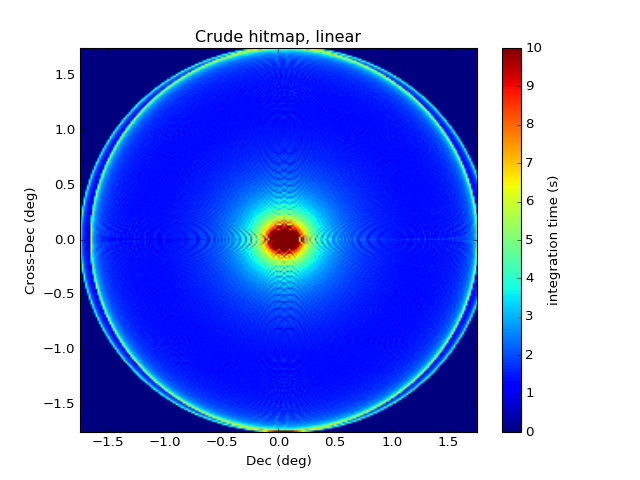

In [10]:
figure()
im = imshow((H+H2).T*sampling_period,aspect='auto',extent=[-radius,radius,-radius,radius],origin='lower')
title("Crude hitmap, linear")
xlabel('Dec (deg)')
ylabel('Cross-Dec (deg)')
clim(0,10)
cb = colorbar(im)
cb.set_label('integration time (s)')


<IPython.core.display.Javascript object>


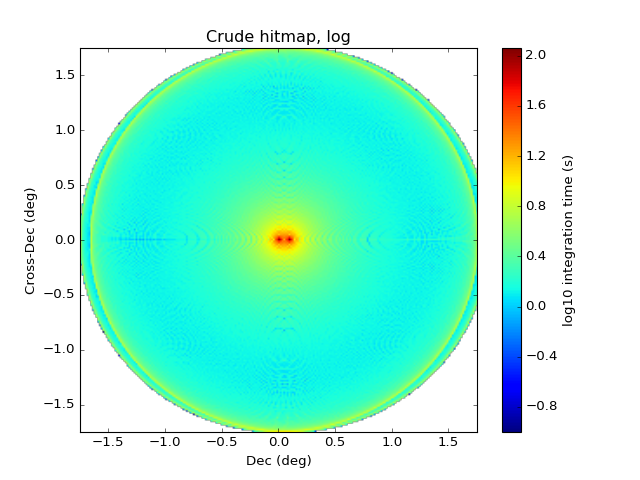

/data/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


In [11]:
figure()
im = imshow(np.log10((H+H2).T*sampling_period),aspect='auto',extent=[-radius,radius,-radius,radius],origin='lower')
title("Crude hitmap, log")
xlabel('Dec (deg)')
ylabel('Cross-Dec (deg)')
cb = colorbar(im)
cb.set_label('log10 integration time (s)')


<IPython.core.display.Javascript object>


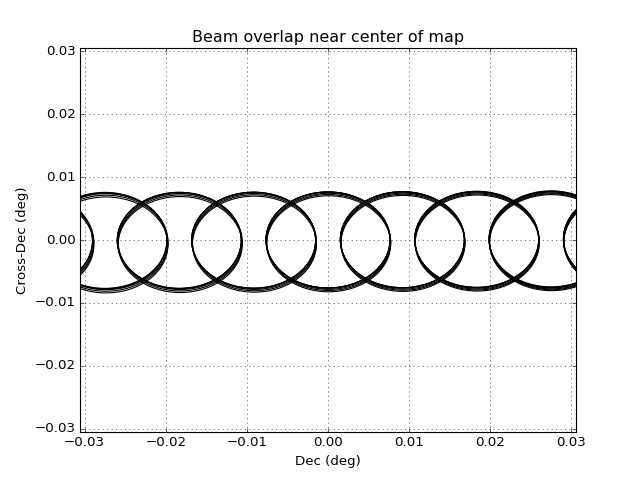

In [12]:
fig,ax = plt.subplots()
patches = []
for x in p[:2000]:
    patches.append(Circle((x.real,x.imag),0.5*beam_fwhm))
    patches.append(Circle((x.real+beam_spacing,x.imag),0.5*beam_fwhm))
    
pc = PatchCollection(patches)
pc.set_facecolor('none')
ax.add_collection(pc)
#ax.set_xlim(-radius,radius)
ax.set_xlim(-beam_fwhm*2,beam_fwhm*2)
ax.set_ylim(-beam_fwhm*2,beam_fwhm*2)
ax.grid()
title('Beam overlap near center of map')
xlabel('Dec (deg)')
ylabel('Cross-Dec (deg)')

<IPython.core.display.Javascript object>


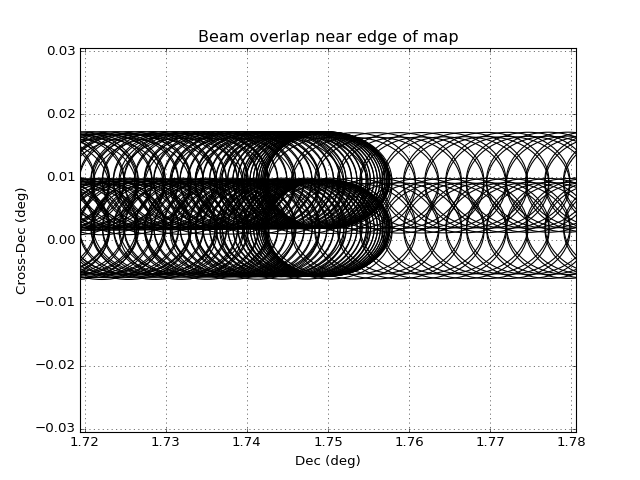

In [13]:
fig,ax = plt.subplots()
patches = []
for x in p[:2000]:
    patches.append(Circle((x.real,x.imag),0.5*beam_fwhm))
    patches.append(Circle((x.real+beam_spacing,x.imag),0.5*beam_fwhm))
    
pc = PatchCollection(patches)
pc.set_facecolor('none')
ax.add_collection(pc)
#ax.set_xlim(-radius,radius)
ax.set_xlim(radius+-beam_fwhm*2,radius+beam_fwhm*2)
ax.set_ylim(-beam_fwhm*2,beam_fwhm*2)
ax.grid()
title('Beam overlap near edge of map')
xlabel('Dec (deg)')
ylabel('Cross-Dec (deg)')

In [14]:
55/3600.

0.015277777777777777

In [15]:
12*60*2

1440

In [16]:
1440*0.01527/2

10.9944

In [17]:
10.9944/(2*np.pi)

1.7498131063295344